In [1]:
import os
os.getcwd()

'C:\\Users\\e.haque'

# Analysis,  Confusion Matrix,accuracy,Precision AUC, ROC and details of Heart Failure Dataset

In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('heart failure.csv.xlsx')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0


In [4]:
df.DEATH_EVENT.value_counts()

0.0    203
1.0     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

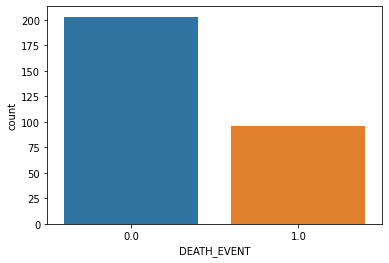

In [7]:
sns.countplot(x='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

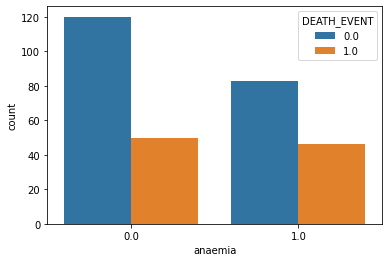

In [9]:
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=df)

In [10]:
from sklearn.datasets import make_classification

In [13]:
x,y=make_classification(n_samples=100000,n_features=200)

In [14]:
X=df.drop('DEATH_EVENT',axis=1)

In [15]:
Y=df['DEATH_EVENT']

In [16]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest=train_test_split(X,Y,random_state=42, test_size=.30)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf=DecisionTreeClassifier()

In [23]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,plot_roc_curve

In [30]:
pred=clf.predict(xtest)

In [31]:
import numpy as np
np.array(ytest)

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0.])

In [32]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n         0.0       0.69      0.79      0.74        53\n         1.0       0.62      0.49      0.55        37\n\n    accuracy                           0.67        90\n   macro avg       0.65      0.64      0.64        90\nweighted avg       0.66      0.67      0.66        90\n'

In [33]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74        53
         1.0       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



In [36]:
accuracy_score(ytest, pred)

0.6666666666666666

In [35]:
confusion_matrix(ytest, pred)

array([[42, 11],
       [19, 18]], dtype=int64)

In [38]:
tp,fn,fp,tn=confusion_matrix(ytest, pred).reshape(-1)

# the Analyisis factors

In [39]:
accuracy_n=(tp+tn)/(tp+fp+tn+fn)

In [40]:
accuracy_n

0.6666666666666666

In [41]:
ppv_n=tp/(tp+fn)

In [43]:
ppv_n

0.7924528301886793

In [44]:
tpr_n=tp/(tp+fn)

In [45]:
tpr_n

0.7924528301886793

In [46]:
fpr_n=fp/(fp+tn)

In [47]:
fpr_n

0.5135135135135135

In [48]:
f1_measure_n=(ppv_n+tpr_n)/2

In [49]:
f1_measure_n

0.7924528301886793

In [50]:
f1_score_n=(2*ppv_n*tpr_n)/(ppv_n+tpr_n)

In [51]:
f1_score_n

0.7924528301886793

In [52]:
tnr_n=tn/(tn+fp)

In [53]:
tnr_n

0.4864864864864865

In [54]:
csi_n=tp/(tp+fn+fp)

In [55]:
csi_n

0.5833333333333334

In [56]:
fdr_n=fp/(tp+fp)

In [57]:
fdr_n

0.3114754098360656

# ROC 

C:\Users\e.haque\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


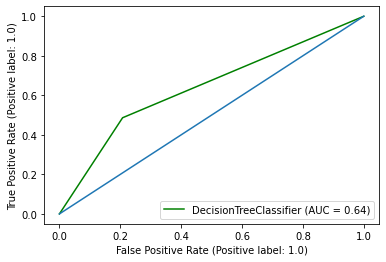

In [60]:
plot_roc_curve(clf,xtest, ytest,color='Green')
plt.plot([0,1],[0,1])